# Linear Algebra Foundations for Machine Learning

This notebook covers essential linear algebra concepts for machine learning:
- Data representation with vectors and matrices
- Linear transformations
- Neural network operations
- Eigenvalues and eigenvectors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 1. Vectors: The Building Blocks of Data

In machine learning, vectors represent data points, features, or parameters.

Vector v1: [3 4]
Vector v2: [1 2]
Magnitude of v1: 5.00
Dot product v1·v2: 11


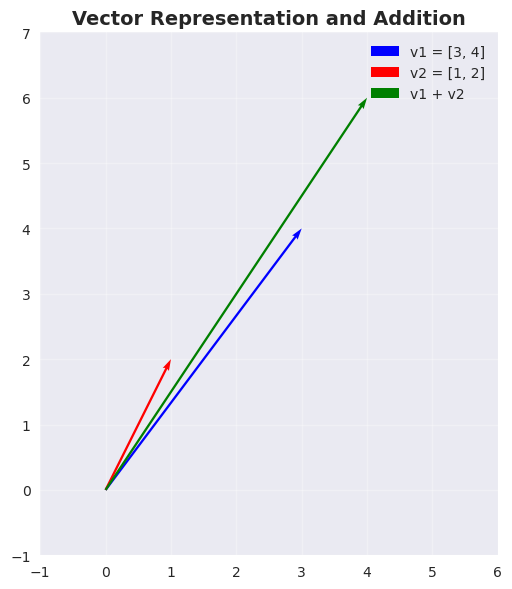

In [2]:
# Vector basics
v1 = np.array([3, 4])
v2 = np.array([1, 2])

print(f"Vector v1: {v1}")
print(f"Vector v2: {v2}")
print(f"Magnitude of v1: {np.linalg.norm(v1):.2f}")
print(f"Dot product v1·v2: {np.dot(v1, v2)}")

# Visualize vectors
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Draw vectors from origin
ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.005, label='v1 = [3, 4]')
ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.005, label='v2 = [1, 2]')
ax.quiver(0, 0, v1[0]+v2[0], v1[1]+v2[1], angles='xy', scale_units='xy', scale=1, color='green', width=0.005, label='v1 + v2')

# Add grid and formatting
ax.grid(True, alpha=0.3)
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 7)
ax.set_aspect('equal')
ax.legend()
ax.set_title('Vector Representation and Addition', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 2. Linear Transformations in 2D

Understanding how matrices transform vectors is crucial for neural networks.

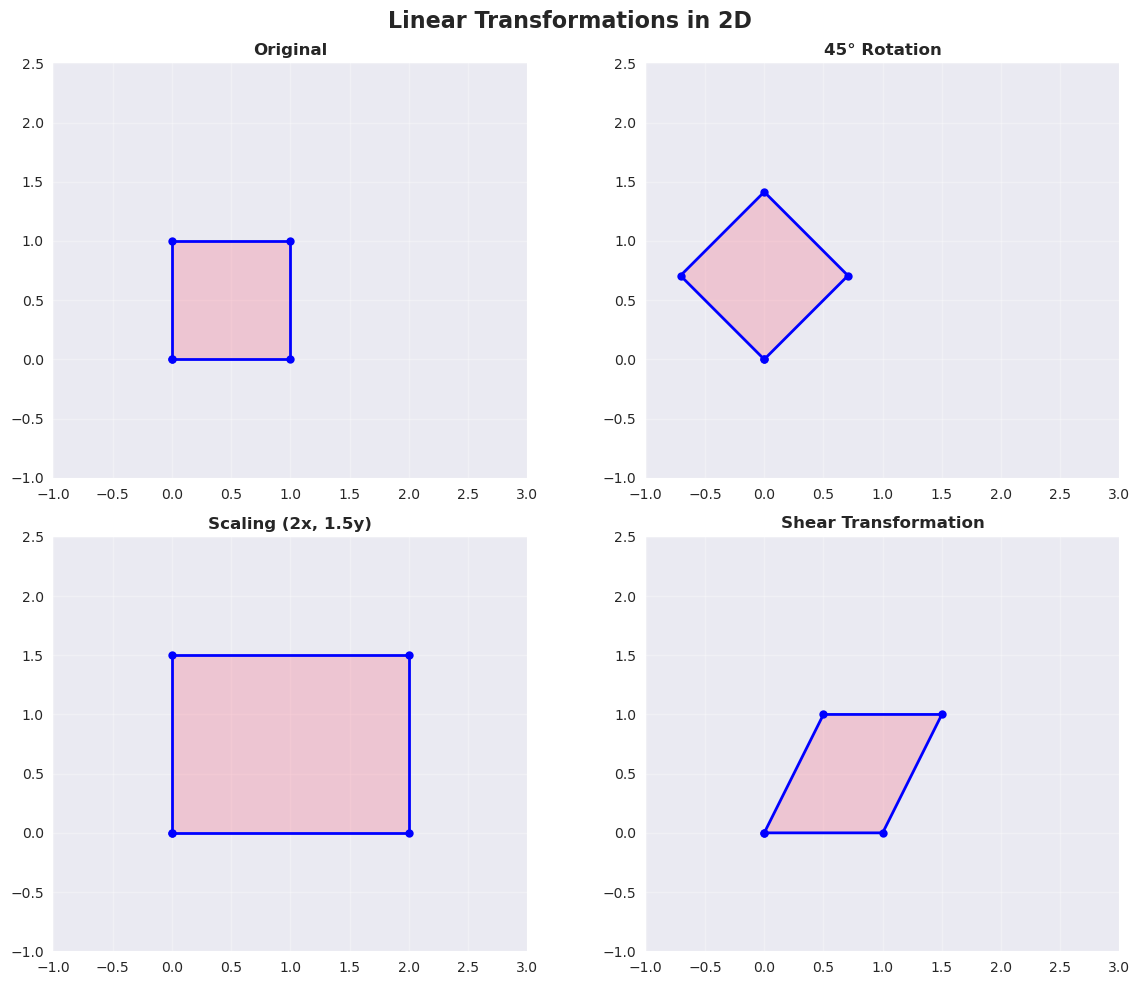

In [3]:
# Define transformation matrices
rotation_45 = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)],
                        [np.sin(np.pi/4), np.cos(np.pi/4)]])

scaling = np.array([[2, 0],
                    [0, 1.5]])

shear = np.array([[1, 0.5],
                  [0, 1]])

# Create a simple shape (square)
square = np.array([[0, 1, 1, 0, 0],
                   [0, 0, 1, 1, 0]])

# Apply transformations
rotated = rotation_45 @ square
scaled = scaling @ square
sheared = shear @ square

# Visualize transformations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

transformations = [
    (square, "Original", axes[0,0]),
    (rotated, "45° Rotation", axes[0,1]),
    (scaled, "Scaling (2x, 1.5y)", axes[1,0]),
    (sheared, "Shear Transformation", axes[1,1])
]

for shape, title, ax in transformations:
    ax.plot(shape[0], shape[1], 'bo-', linewidth=2, markersize=6)
    ax.fill(shape[0], shape[1], alpha=0.3)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-1, 3)
    ax.set_ylim(-1, 2.5)
    ax.set_aspect('equal')
    ax.set_title(title, fontweight='bold')

plt.suptitle('Linear Transformations in 2D', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 3. Matrix Operations for Neural Networks

Neural networks are essentially chains of matrix multiplications.

Input data shape: (3, 4)
Input data:
[[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]]

Hidden layer output shape: (3, 5)
Hidden layer output:
[[0.06926734 0.         0.         0.         0.16037189]
 [0.02647319 0.         0.         0.         0.        ]
 [0.         0.13455673 0.04316722 0.12880112 0.00237308]]


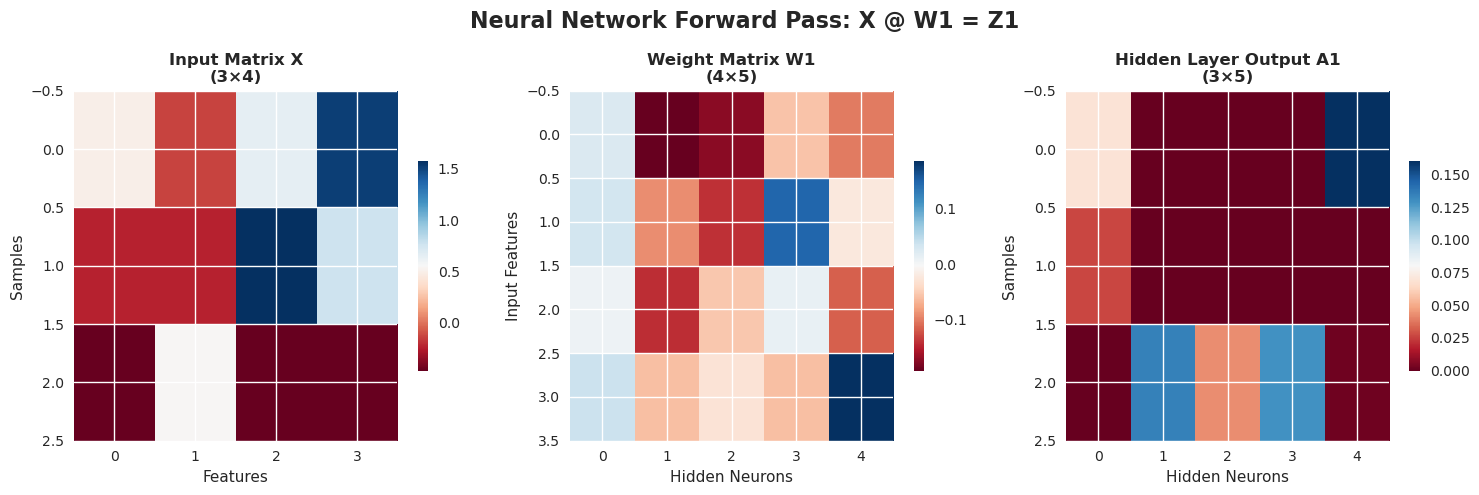

In [4]:
# Simulate a simple neural network forward pass
np.random.seed(42)

# Input data (3 samples, 4 features)
X = np.random.randn(3, 4)
print("Input data shape:", X.shape)
print("Input data:")
print(X)

# Weights for hidden layer (4 input features → 5 hidden neurons)
W1 = np.random.randn(4, 5) * 0.1
b1 = np.zeros((1, 5))

# Forward pass to hidden layer
Z1 = X @ W1 + b1  # Matrix multiplication
A1 = np.maximum(0, Z1)  # ReLU activation

print("\nHidden layer output shape:", A1.shape)
print("Hidden layer output:")
print(A1)

# Visualize the matrix multiplication
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Input matrix
im1 = axes[0].imshow(X, cmap='RdBu', aspect='auto')
axes[0].set_title('Input Matrix X\n(3×4)', fontweight='bold')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Samples')
plt.colorbar(im1, ax=axes[0], shrink=0.6)

# Weight matrix
im2 = axes[1].imshow(W1, cmap='RdBu', aspect='auto')
axes[1].set_title('Weight Matrix W1\n(4×5)', fontweight='bold')
axes[1].set_xlabel('Hidden Neurons')
axes[1].set_ylabel('Input Features')
plt.colorbar(im2, ax=axes[1], shrink=0.6)

# Output matrix
im3 = axes[2].imshow(A1, cmap='RdBu', aspect='auto')
axes[2].set_title('Hidden Layer Output A1\n(3×5)', fontweight='bold')
axes[2].set_xlabel('Hidden Neurons')
axes[2].set_ylabel('Samples')
plt.colorbar(im3, ax=axes[2], shrink=0.6)

plt.suptitle('Neural Network Forward Pass: X @ W1 = Z1', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Eigenvalues and Eigenvectors

Essential for understanding PCA, covariance matrices, and data dimensionality.

Matrix A:
[[3 1]
 [1 2]]

Eigenvalues: [3.61803399 1.38196601]
Eigenvectors:
[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


/tmp/ipykernel_911/2050209149.py:41: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data = np.random.multivariate_normal([0, 0], [[2, 1.5], [1.5, 1]], n_samples)


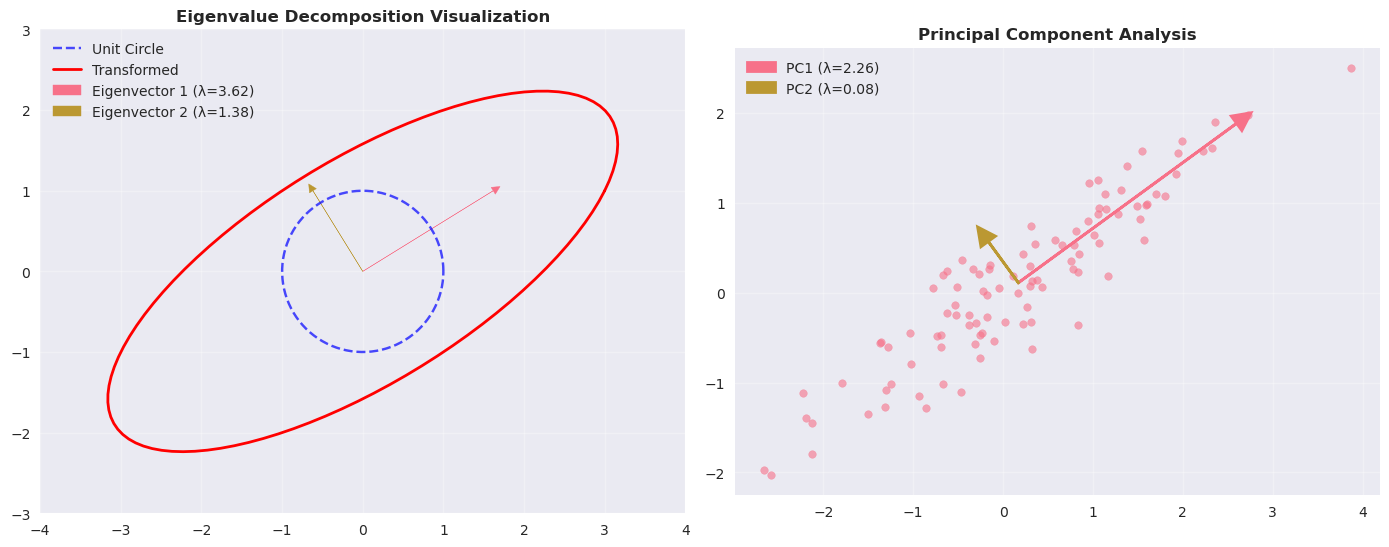


Explained variance ratio: [0.96544583 0.03455417]


In [5]:
# Create a covariance-like matrix
A = np.array([[3, 1],
              [1, 2]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Matrix A:")
print(A)
print(f"\nEigenvalues: {eigenvalues}")
print(f"Eigenvectors:\n{eigenvectors}")

# Visualize eigenvectors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Eigenvectors on unit circle
theta = np.linspace(0, 2*np.pi, 100)
unit_circle = np.array([np.cos(theta), np.sin(theta)])
transformed_circle = A @ unit_circle

ax1.plot(unit_circle[0], unit_circle[1], 'b--', alpha=0.7, label='Unit Circle')
ax1.plot(transformed_circle[0], transformed_circle[1], 'r-', linewidth=2, label='Transformed')

# Draw eigenvectors
for i, (val, vec) in enumerate(zip(eigenvalues, eigenvectors.T)):
    ax1.arrow(0, 0, vec[0]*np.sqrt(val), vec[1]*np.sqrt(val), 
             head_width=0.1, head_length=0.1, fc=f'C{i}', ec=f'C{i}',
             label=f'Eigenvector {i+1} (λ={val:.2f})')

ax1.grid(True, alpha=0.3)
ax1.set_xlim(-4, 4)
ax1.set_ylim(-3, 3)
ax1.set_aspect('equal')
ax1.legend()
ax1.set_title('Eigenvalue Decomposition Visualization', fontweight='bold')

# Plot 2: Principal Component Analysis example
np.random.seed(42)
# Generate correlated data
n_samples = 100
data = np.random.multivariate_normal([0, 0], [[2, 1.5], [1.5, 1]], n_samples)

# Compute covariance matrix
cov_matrix = np.cov(data.T)
eigenvals_pca, eigenvecs_pca = np.linalg.eig(cov_matrix)

# Sort by eigenvalue
idx = eigenvals_pca.argsort()[::-1]
eigenvals_pca = eigenvals_pca[idx]
eigenvecs_pca = eigenvecs_pca[:, idx]

ax2.scatter(data[:, 0], data[:, 1], alpha=0.6, s=30)

# Draw principal components
mean = np.mean(data, axis=0)
for i, (val, vec) in enumerate(zip(eigenvals_pca, eigenvecs_pca.T)):
    ax2.arrow(mean[0], mean[1], vec[0]*np.sqrt(val)*2, vec[1]*np.sqrt(val)*2,
             head_width=0.2, head_length=0.2, fc=f'C{i}', ec=f'C{i}', linewidth=2,
             label=f'PC{i+1} (λ={val:.2f})')

ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')
ax2.legend()
ax2.set_title('Principal Component Analysis', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nExplained variance ratio: {eigenvals_pca/np.sum(eigenvals_pca)}")

## 5. Interactive Visualization: Matrix Transformations

Use sliders to see how different matrix parameters affect transformations.

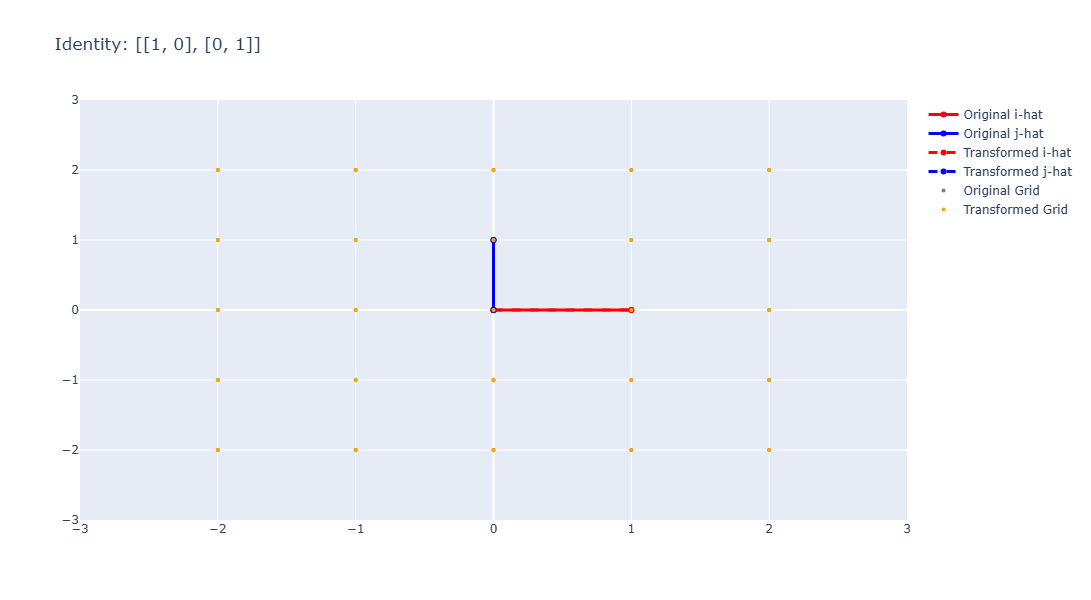

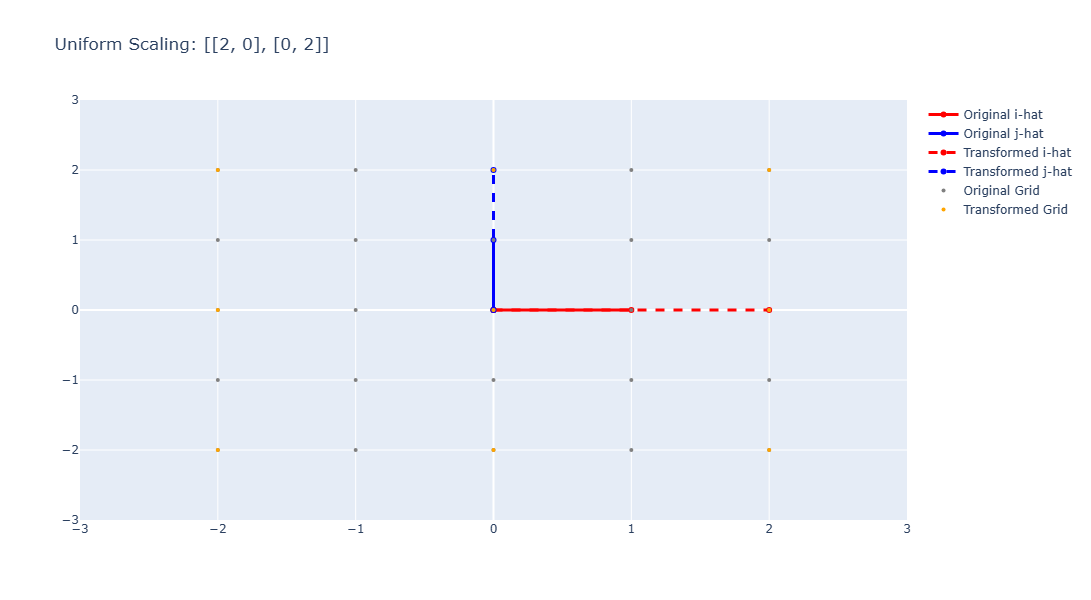

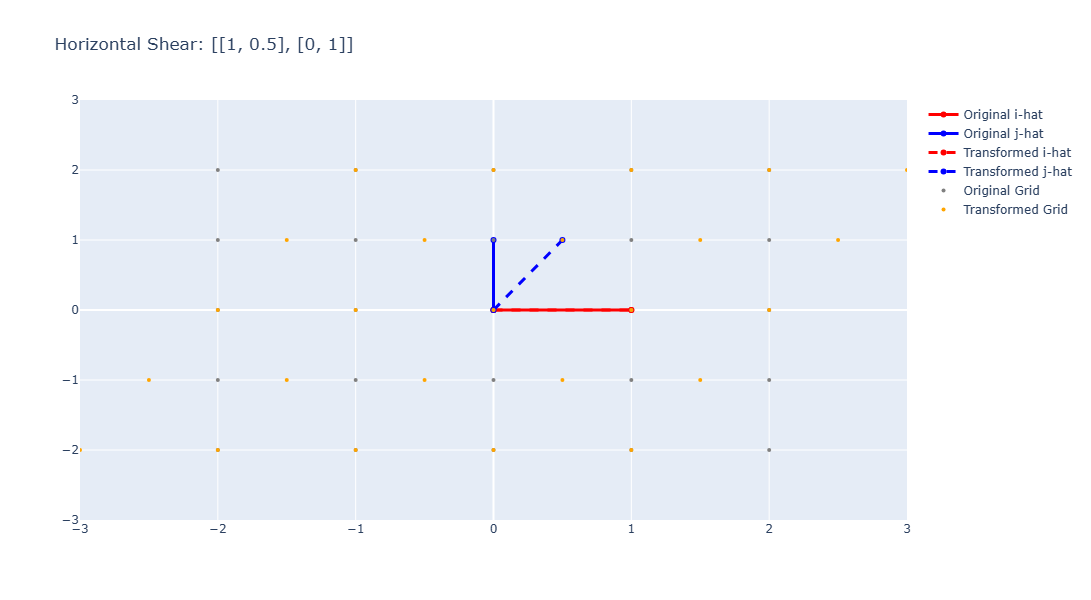

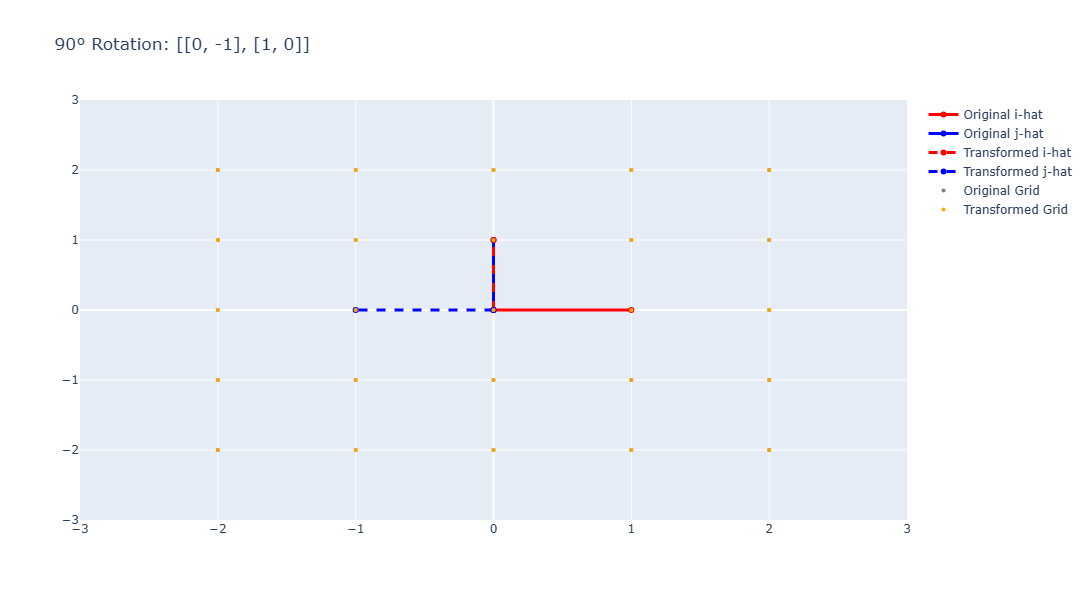

In [6]:
# Interactive transformation with Plotly
def create_transformation_plot(a=1, b=0, c=0, d=1):
    """Create interactive transformation visualization"""
    # Original vectors
    basis_vectors = np.array([[1, 0], [0, 1]]).T
    
    # Transformation matrix
    T = np.array([[a, b], [c, d]])
    
    # Transformed vectors
    transformed = T @ basis_vectors
    
    # Create grid for visualization
    x_grid = np.linspace(-2, 2, 5)
    y_grid = np.linspace(-2, 2, 5)
    xx, yy = np.meshgrid(x_grid, y_grid)
    grid_points = np.column_stack([xx.ravel(), yy.ravel()]).T
    transformed_grid = T @ grid_points
    
    fig = go.Figure()
    
    # Original basis vectors
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 0], mode='lines+markers',
                           name='Original i-hat', line=dict(color='red', width=3)))
    fig.add_trace(go.Scatter(x=[0, 0], y=[0, 1], mode='lines+markers',
                           name='Original j-hat', line=dict(color='blue', width=3)))
    
    # Transformed basis vectors
    fig.add_trace(go.Scatter(x=[0, transformed[0,0]], y=[0, transformed[1,0]], 
                           mode='lines+markers', name='Transformed i-hat',
                           line=dict(color='red', width=3, dash='dash')))
    fig.add_trace(go.Scatter(x=[0, transformed[0,1]], y=[0, transformed[1,1]], 
                           mode='lines+markers', name='Transformed j-hat',
                           line=dict(color='blue', width=3, dash='dash')))
    
    # Add grid points
    fig.add_trace(go.Scatter(x=grid_points[0], y=grid_points[1], mode='markers',
                           name='Original Grid', marker=dict(color='gray', size=4)))
    fig.add_trace(go.Scatter(x=transformed_grid[0], y=transformed_grid[1], mode='markers',
                           name='Transformed Grid', marker=dict(color='orange', size=4)))
    
    fig.update_layout(
        title=f'Linear Transformation: [[{a}, {b}], [{c}, {d}]]',
        xaxis=dict(range=[-3, 3], zeroline=True),
        yaxis=dict(range=[-3, 3], zeroline=True),
        width=600, height=600
    )
    
    return fig

# Example transformations
transformations = [
    (1, 0, 0, 1, "Identity"),
    (2, 0, 0, 2, "Uniform Scaling"),
    (1, 0.5, 0, 1, "Horizontal Shear"),
    (0, -1, 1, 0, "90° Rotation")
]

for a, b, c, d, name in transformations:
    fig = create_transformation_plot(a, b, c, d)
    fig.update_layout(title=f'{name}: [[{a}, {b}], [{c}, {d}]]')
    fig.show()

## 6. Practical Applications in Machine Learning

### Dimensionality Reduction with PCA

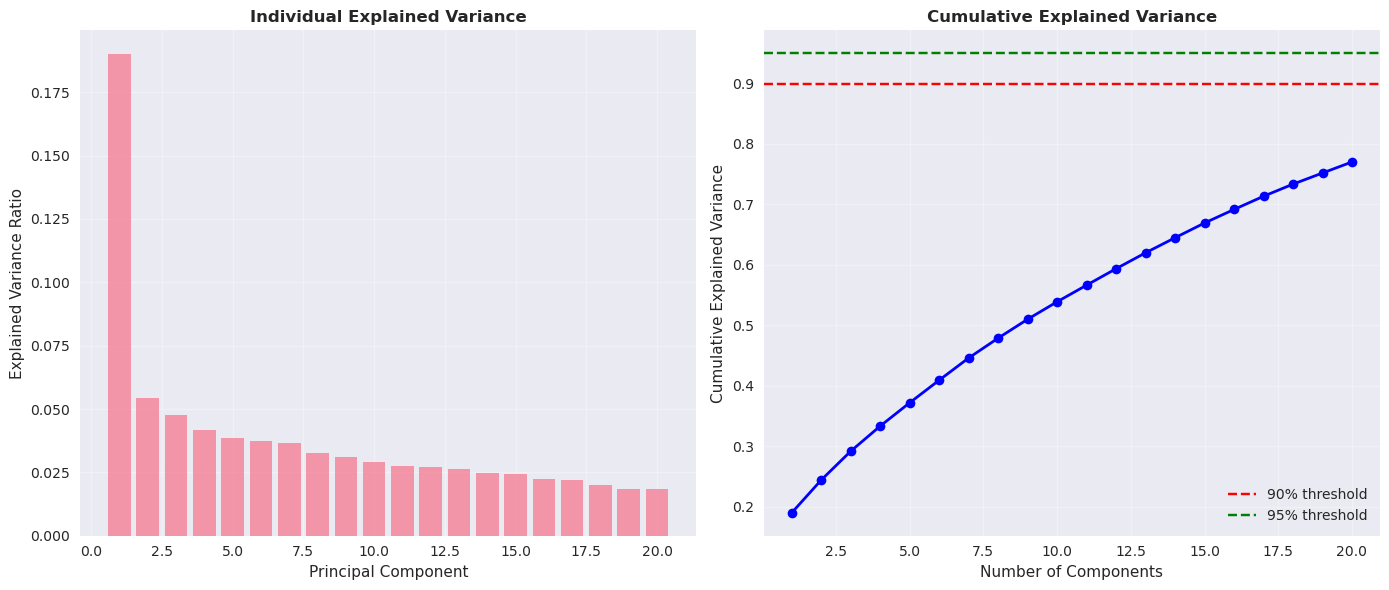

Number of components needed for 95% variance: 36
Dimensionality reduction: 50 → 36 (28.0% reduction)


In [7]:
# Generate high-dimensional data
np.random.seed(42)
n_samples, n_features = 100, 50
X_high_dim = np.random.randn(n_samples, n_features)

# Add some correlation structure
for i in range(1, 10):
    X_high_dim[:, i] = X_high_dim[:, 0] + 0.5 * np.random.randn(n_samples)

# Perform PCA
# Center the data
X_centered = X_high_dim - np.mean(X_high_dim, axis=0)

# Compute covariance matrix
cov_matrix = np.cov(X_centered.T)

# Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort by eigenvalue
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Calculate cumulative explained variance
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Visualize explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Individual explained variance
ax1.bar(range(1, 21), explained_variance_ratio[:20], alpha=0.7)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Individual Explained Variance', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Cumulative explained variance
ax2.plot(range(1, 21), cumulative_variance[:20], 'bo-', linewidth=2)
ax2.axhline(y=0.9, color='r', linestyle='--', label='90% threshold')
ax2.axhline(y=0.95, color='g', linestyle='--', label='95% threshold')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components needed for 95% variance: {n_components_95}")
print(f"Dimensionality reduction: {n_features} → {n_components_95} ({100*(1-n_components_95/n_features):.1f}% reduction)")